   # TP Graphes : modéliser un labyrinthe
   adaptation d'un TP publié sur : https://www.di.ens.fr/~mauborgn/td-99/programmation/tp8.html
   

Considérons le problème suivant :

Comment rechercher le chemin le plus long entre deux stations dans le métro? Indépendamment de l'aspect ludique, c'est en fait un problème difficile qu'on aurait bien du mal à résoudre de façon raisonnable sur un gros graphe comme celui du métro. 
Pour simplifier, nous allons donc considérer des labyrinthes.

## Les labyrinthes

Voici l'image d'un labyrinthe :

<img src="https://www.di.ens.fr/~mauborgn/td-99/programmation/petitlab.gif">

Ce labyrinthe peut etre représenter par le graphe suivant :

<img src="https://www.di.ens.fr/~mauborgn/td-99/programmation/petit.gif">

**- Chaque somment du graphe correspond à une case du labyrinthe**

**- une arête relie 2 cases voisines quand le passage est possible.**

**- Si une paroie empêche de passer on ne met pas l'arête.**

Par exemple il n'y a pas d'arête entre les sommets (1,1) et (1,2) mais il y en a une entre (1,1) et (2,1).

Implémentez ce labyrinthe avec un graphe.
Vous utiliserez l'implémentation de graphe fournie ci-dessous, vous nommerez les sommets (1,1) (1,2) .. etc 



In [4]:
class graph() :
    def __init__(self) :
        self.lstAdj={}
    def __str__(self):
        return str(self.lstAdj)
    def addSommet(self,sommet):
        self.lstAdj[sommet]=[]
    def addArete(self,sa,sb) :
        self.lstAdj[sa].append(sb)
        self.lstAdj[sb].append(sa)

# 1) créez un graphe labyrinthe
# 2) ajoutez les sommets (1,1) et (1,2 puis l'arête (1,1)--(1,2)
labyrinthe=graph()
labyrinthe.addSommet((1,1))
labyrinthe.addSommet((1,2))
labyrinthe.addArete((1,1),(1,2))



In [5]:
assert labyrinthe.lstAdj[(1,1)] == [(1,2)],"vous avez fait une erreur..."

## Ajoutons tous les sommets dans le graphe représentant ce labyrinthe


In [6]:
# Entrez tous les sommets. Vous ne devez pas les entrer un par un, utilisez deux boucles imbriquées...
for i in range(1,5):
    for j in range(1,9):
        labyrinthe.addSommet( (i,j) )

## Ajoutons les arêtes.
C'est un peu fastidieux, alors nous vous fournissons une version avec la plupart des arêtes déjà ajoutées, mais il en manque quelques unes....

In [7]:
labyrinthe.addArete((1,1),(2,1))
labyrinthe.addArete((2,1),(2,2))
labyrinthe.addArete((2,2),(2,3))
labyrinthe.addArete((2,2),(3,2))
labyrinthe.addArete((2,3),(1,3))
labyrinthe.addArete((1,3),(1,4))
labyrinthe.addArete((1,4),(1,5))
labyrinthe.addArete((1,4),(2,4))
labyrinthe.addArete((1,5),(2,5))
labyrinthe.addArete((2,7),(3,7))
labyrinthe.addArete((1,6),(1,7))
labyrinthe.addArete((2,4),(3,4))
labyrinthe.addArete((1,7),(1,8))
labyrinthe.addArete((1,8),(2,8))
labyrinthe.addArete((3,2),(4,2))
labyrinthe.addArete((4,2),(4,3))
labyrinthe.addArete((4,3),(4,4))
labyrinthe.addArete((3,4),(3,5))
labyrinthe.addArete((3,5),(3,6))
labyrinthe.addArete((3,6),(4,6))
labyrinthe.addArete((3,6),(3,7))
labyrinthe.addArete((4,6),(4,5))
labyrinthe.addArete((3,7),(4,7))
labyrinthe.addArete((4,7),(4,8))
labyrinthe.addArete((4,8),(3,8))
labyrinthe.addArete((2,8),(3,8))

#print(str(labyrinthe))
print(labyrinthe.lstAdj[(1,1)])
print(labyrinthe)

[(2, 1)]
{(1, 1): [(2, 1)], (1, 2): [], (1, 3): [(2, 3), (1, 4)], (1, 4): [(1, 3), (1, 5), (2, 4)], (1, 5): [(1, 4), (2, 5)], (1, 6): [(1, 7)], (1, 7): [(1, 6), (1, 8)], (1, 8): [(1, 7), (2, 8)], (2, 1): [(1, 1), (2, 2)], (2, 2): [(2, 1), (2, 3), (3, 2)], (2, 3): [(2, 2), (1, 3)], (2, 4): [(1, 4), (3, 4)], (2, 5): [(1, 5)], (2, 6): [], (2, 7): [(3, 7)], (2, 8): [(1, 8), (3, 8)], (3, 1): [], (3, 2): [(2, 2), (4, 2)], (3, 3): [], (3, 4): [(2, 4), (3, 5)], (3, 5): [(3, 4), (3, 6)], (3, 6): [(3, 5), (4, 6), (3, 7)], (3, 7): [(2, 7), (3, 6), (4, 7)], (3, 8): [(4, 8), (2, 8)], (4, 1): [], (4, 2): [(3, 2), (4, 3)], (4, 3): [(4, 2), (4, 4)], (4, 4): [(4, 3)], (4, 5): [(4, 6)], (4, 6): [(3, 6), (4, 5)], (4, 7): [(3, 7), (4, 8)], (4, 8): [(4, 7), (3, 8)]}


# dessin de votre labyrinthe
En creant votre graphe vous avez creer votre labyrinthe.
Pour visualiser le labyrinthe vous allez avoir besoin des fonctions ci-dessous.
Vpus n'avez pas besoin de les regarder, la seule chose dont vous avez besoin c'est de dessiner ce labyrinthe en executant dans la cellule suivante la commande showLabyrinthe(cote,nli,ncol) ou :
cote est un entier qui code la longuer des coté des cases (ici on va prendre 50)
nli et ncol sont les nombres de lignes et de colones de votre labyrinthe, donc ici 4 et 8

In [7]:
import turtle as t

def showLabyrinthe(labyrinthe,cote,nli,ncol):
  lab=t.Turtle()
  t.speed(0)

  cadre(nli,ncol,cote)
  paroiesVerticales(nli,ncol,cote)
  paroiesHorizontales(nli,ncol,cote)
  #t.exitonclick()
  t.mainloop()


def cadre(nli,ncol,cote):
    t.up()
    t.goto(-100,100)
    t.down()
    #dessin parois extérieures

    for _ in range(2):
        for i in range(ncol):
            t.forward(cote)
        t.right(90)
        for i in range(nli):
            t.forward(cote)
        t.right(90)

def paroiesVerticales(nli,ncol,dist):
    # dessin des parois internes verticales

    for i in range(1,nli+1):
        for j in range(1,ncol) :
            dess=(i,j+1) not in labyrinthe.lstAdj[(i,j)]
            if dess :
                t.up()
                t.forward(dist)
                t.down()
                t.right(90)
                t.forward(dist)
                t.backward(dist)
                t.left(90)
            else :
                t.up()
                t.forward(dist)

        t.up()
        t.goto(-100,100)
        t.right(90)
        t.forward(dist*i)
        t.left(90)
def paroiesHorizontales(nli,ncol,cote):

    # dessin des parois internes horizontales
    t.up()
    t.goto(-100,100-cote)
    for i in range(1,nli):
        for j in range(1,ncol) :
            dess=(i+1,j) not in labyrinthe.lstAdj[(i,j)]
            if dess :
                t.down()
                t.forward(cote)
            else :
                t.up()
                t.forward(cote)

        t.up()
        t.goto(-100,100-cote*(i+1))



In [8]:
#exécutez le dessin :
showLabyrinthe(labyrinthe,50,4,8)

#le dessin peut s'ouvrir dans une fenêtre qui sera peut-être en bas de l'écran dans la barre de tâches
######### ATTENTION ##############
# avant de poursuivre vous devez ouvrir la fenêtre.
# Vous devrez ensuite ne pas oublier de fermer cette fenêtre

Maintenant comme pour comme pour le labyrinthe, vous allez pouvoir visualiser le graphe avec le code ci-dessous.
Vous pourrez l'exécuter  la cellule suivante.

In [1]:
import turtle as t

def drawGraph() :
    lab=t.Turtle()
    t.speed(0)
    t.up()
    t.ht()
    t.goto(-100,100)
    for i in range(1,5) :
        for j in range(1,9) :
            drawCircle(50,i,j)
            t.forward(50)
        t.right(90)
        t.forward(50)
        t.left(90)
        t.backward(50*8)
    #t.exitonclick()
    t.mainloop()
            
def drawCircle(cote,i,j) :
    t.up()
    t.forward(cote/2)
    t.left(90)
    t.forward(cote/4)
    t.right(90)
    t.down()
    t.circle(cote/4)
    t.left(90)
    t.forward(5)
    t.write(str(i)+','+str(j),align='center')
    t.backward(5)
    t.right(90)
    if (i+1,j) in labyrinthe.lstAdj[(i,j)] :
        drawArreteVert(50)
    if (i,j+1) in labyrinthe.lstAdj[(i,j)] :
        drawArreteHor(50)
    t.up()
    t.left(90)
    t.backward(cote/4)
    t.right(90)
    t.backward(cote/2)

def drawArreteHor(cote):
    t.up()
    t.pencolor("red")
    t.forward(cote/4)
    t.left(90)
    t.forward(cote/4)
    t.right(90)
    t.down()
    t.forward(cote/2)
    t.up()
    t.backward(cote/2)
    t.left(90)
    t.backward(cote/4)
    t.right(90)
    t.backward(cote/4)
    t.pencolor("black")
    
def drawArreteVert(cote):
        t.pencolor("red")
        t.right(90)
        t.forward(cote/2)
        t.backward(cote/2)
        t.left(90)
        t.pencolor("black")
        


In [2]:
drawGraph()

NameError: name 'labyrinthe' is not defined

Comme vous pouvez le constater, toutes les arêtes issues de (2,6) ont été oubliées....
A vous de les ajouter, puis de redessiner le labyrinthe et le graphe pour vérifier.

In [8]:
labyrinthe.addArete((2,5),(2,6))
labyrinthe.addArete((2,6),(1,6))
labyrinthe.addArete((2,6),(3,6))
labyrinthe.addArete((2,6),(2,7))


In [3]:
#réexécutez le dessin du labyrinthe:
showLabyrinthe(labyrinthe,50,4,8)

NameError: name 'showLabyrinthe' is not defined

In [ ]:
#réexécutez le dessin du graphe:
drawGraph()

<center><font color="red" size="10">Questions</font></center>

<b>1) Faites afficher les case ou je peux me rendre si je suis en (3,4)</b>

In [9]:
print(labyrinthe.lstAdj[(3,4)])

[(2, 4), (3, 5)]


<b>2) Ecrire une fonction passage(case1,case2) qui renvoie True si on peut passer de case1 à case2 et False sinon.
</br>    
</b>
La fonction doit vérifier que les 2 cases sont contiguës et qu'il n'y a pas de paroie empêchant le passage

In [10]:
def passage(case1,case2) :
    voisinH = case1[0]==case2[0] and abs(case1[1]-case2[1])==1

    voisinV = case1[1]==case2[1] and abs(case1[0]-case2[0])==1

    paroie = case2 not in labyrinthe.lstAdj[case1]
    if (voisinH or voisinV) and  not paroie :
        return True
    else :
        return False


In [11]:
#tests :
ok=True
if passage( (1,2),(2,2))!=False : ok=False
if passage( (2,2),(3,2))!=True  : ok=False
if passage( (2,2),(3,3))!=False : ok=False
if passage( (2,2),(2,2))!=False : ok=False
if passage( (2,2),(1,1))!=False : ok=False
if passage( (2,3),(2,5))!=False : ok=False

if ok :
    print('Tests ok') 
else :
    print("passage n'a pas passé les tests")

Tests ok


## IV. Représentation du graphe  et approfondissement de la notion de dictionnaire

Il n'est pas habituel de représenter des noeuds pas des couples. On rencontre habituellement de simples numéros.

1.  Au lieu de choisir comme clés du dictionnnaire des tuples, aurait-il été possible de choisir des listes ?
Par exemple à la clé [1,1], correspondrait la valeur [(2, 1)].

Réponse : Non, ce n'est pas possible car les clés des dictionnaires doivent être de type non mutable, ce qui n'est pas le cas des listes.


Sur son site, David Roche explique : "l'implémentation des dictionnaires dans les langages de programmation peut se faire à l'aide des tables de hachage. Les tables de hachages ainsi que les fonctions de hachages qui sont utilisées pour construire les tables de hachages, ne sont pas au programme de NSI. Cependant, l'utilisation des fonctions de hachages est omniprésente en informatique, il serait donc bon, pour votre "culture générale informatique", de connaitre le principe des fonctions de hachages.
Pour avoir quelques idées sur le principe des tables de hachages, je vous recommande le visionnage de cette vidéo : [https://www.youtube.com/watch?v=CkLctGYWFPA]"

2. Pour simplifier la représentation de ce graphe, nous allons remplacer chaque noeud (i,j) par un simple numéro:
(1,1) sera remplacé par 1, (1,2) par 2, (1,3) par 3 ... (2,1) par 9 etc...
D'une manière générale, (i,j) sera remplacé par le numéro (i-1)*8+j.
Dans la première partie, nous avons créé le dictionnaire suivant :

In [12]:
labyrinthe = {(1, 1): [(2, 1)], (1, 2): [], (1, 3): [(2, 3), (1, 4)], (1, 4): [(1, 3), (1, 5), (2, 4)], (1, 5): [(1, 4), (2, 5)],\
 (1, 6): [(2, 6), (1, 7)], (1, 7): [(1, 6), (1, 8)], (1, 8): [(1, 7), (2, 8)], (2, 1): [(1, 1), (2, 2)],\
 (2, 2): [(2, 1), (2, 3), (3, 2)], (2, 3): [(2, 2), (1, 3)], (2, 4): [(1, 4), (3, 4)], (2, 5): [(1, 5), (2, 6)],\
 (2, 6): [(2, 5), (1, 6), (3, 6), (2, 7)], (2, 7): [(3, 7), (2, 6)], (2, 8): [(1, 8), (3, 8)], (3, 1): [],\
 (3, 2): [(2, 2), (4, 2)], (3, 3): [], (3, 4): [(2, 4), (3, 5)], (3, 5): [(3, 4), (3, 6)], \
 (3, 6): [(2, 6), (3, 5), (4, 6), (3, 7)], (3, 7): [(2, 7), (3, 6), (4, 7)], (3, 8): [(2, 8), (4, 8)], (4, 1): [],\
 (4, 2): [(3, 2), (4, 3)], (4, 3): [(4, 2), (4, 4)], (4, 4): [(4, 3)], (4, 5): [(4, 6)], (4, 6): [(3, 6), (4, 5)],\
 (4, 7): [(3, 7), (4, 8)], (4, 8): [(4, 7), (3, 8)]}

Vous devez créer un dictionnaire qui représente le même graphe, mais avec les noeuds simplifiés. On obtient :  
`graphe_allege = {1: [9], 2: [], 3: [11, 4] etc...}`  
Pour cela vous pouvez créer des correspondances entre les couples (i,j) et le numéro correspondant. Réfléchissez à la structure adaptée que vous allez utiliser pour cela.
Utilisez cette structure pour écrire le script qui crée ce nouveau dictionnaire.

In [13]:
corresp = {}
for i in range(1,5):
    for j in range(1,9):
        corresp[(i,j)]=(i-1)*8+j
print("Correspondances : ",corresp)


labyrinthe = {(1, 1): [(2, 1)], (1, 2): [], (1, 3): [(2, 3), (1, 4)], (1, 4): [(1, 3), (1, 5), (2, 4)], (1, 5): [(1, 4), (2, 5)],\
 (1, 6): [(2, 6), (1, 7)], (1, 7): [(1, 6), (1, 8)], (1, 8): [(1, 7), (2, 8)], (2, 1): [(1, 1), (2, 2)],\
 (2, 2): [(2, 1), (2, 3), (3, 2)], (2, 3): [(2, 2), (1, 3)], (2, 4): [(1, 4), (3, 4)], (2, 5): [(1, 5), (2, 6)],\
 (2, 6): [(2, 5), (1, 6), (3, 6), (2, 7)], (2, 7): [(3, 7), (2, 6)], (2, 8): [(1, 8), (3, 8)], (3, 1): [],\
 (3, 2): [(2, 2), (4, 2)], (3, 3): [], (3, 4): [(2, 4), (3, 5)], (3, 5): [(3, 4), (3, 6)], \
 (3, 6): [(2, 6), (3, 5), (4, 6), (3, 7)], (3, 7): [(2, 7), (3, 6), (4, 7)], (3, 8): [(2, 8), (4, 8)], (4, 1): [],\
 (4, 2): [(3, 2), (4, 3)], (4, 3): [(4, 2), (4, 4)], (4, 4): [(4, 3)], (4, 5): [(4, 6)], (4, 6): [(3, 6), (4, 5)],\
 (4, 7): [(3, 7), (4, 8)], (4, 8): [(4, 7), (3, 8)]}
graphe_allege = {}
for noeud in labyrinthe:
    graphe_allege[corresp[noeud]]=[corresp[tuple] for tuple in labyrinthe[noeud]]
print("Nouveau dictionnaire : ",graphe_allege)

Correspondances :  {(1, 1): 1, (1, 2): 2, (1, 3): 3, (1, 4): 4, (1, 5): 5, (1, 6): 6, (1, 7): 7, (1, 8): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11, (2, 4): 12, (2, 5): 13, (2, 6): 14, (2, 7): 15, (2, 8): 16, (3, 1): 17, (3, 2): 18, (3, 3): 19, (3, 4): 20, (3, 5): 21, (3, 6): 22, (3, 7): 23, (3, 8): 24, (4, 1): 25, (4, 2): 26, (4, 3): 27, (4, 4): 28, (4, 5): 29, (4, 6): 30, (4, 7): 31, (4, 8): 32}
Nouveau dictionnaire :  {1: [9], 2: [], 3: [11, 4], 4: [3, 5, 12], 5: [4, 13], 6: [14, 7], 7: [6, 8], 8: [7, 16], 9: [1, 10], 10: [9, 11, 18], 11: [10, 3], 12: [4, 20], 13: [5, 14], 14: [13, 6, 22, 15], 15: [23, 14], 16: [8, 24], 17: [], 18: [10, 26], 19: [], 20: [12, 21], 21: [20, 22], 22: [14, 21, 30, 23], 23: [15, 22, 31], 24: [16, 32], 25: [], 26: [18, 27], 27: [26, 28], 28: [27], 29: [30], 30: [22, 29], 31: [23, 32], 32: [31, 24]}


Nous pouvons déjà visualiser succinctement ce ghraphe grâce au code ci-dessous.
Remarque : vous pouvez exécuter plusieurs fois les lignes qui suivent, jusqu'à obtenir une représentation plus "agréable"


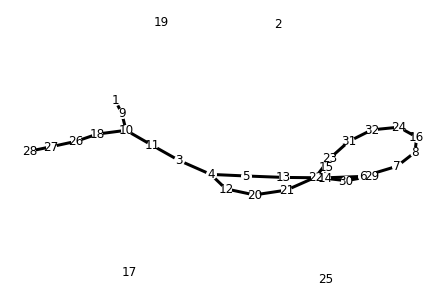

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
def cree_graphe_non_oriente_nx(dictionnaire: dict) -> nx.Graph:
    """
    Cette fonction premet de transformer une représentation en dictionnaire en
    une représentation «complexe» d'un objet graphe orienté.

    - Précondition : l'entrée est un dictionnaire
    - Postcondition : la sortie est un graphe orienté (Graph) de Networkx
    """
    Gnx = nx.Graph() 
    for sommets in dictionnaire.keys():
        Gnx.add_node(sommets) # Creation des sommets
    for sommet in dictionnaire.keys():
        for sommets_adjacents in dictionnaire[sommet]:
            Gnx.add_edge(sommet, sommets_adjacents,length=300) # Creation des arcs
    return Gnx



graphe={1: [9], 2: [], 3: [11, 4], 4: [3, 5, 12], 5: [4, 13], 6: [14, 7], 7: [6, 8], 8: [7, 16], 9: [1, 10],\
        10: [9, 11, 18], 11: [10, 3], 12: [4, 20], 13: [5, 14], 14: [13, 6, 22, 15], 15: [23, 14], 16: [8, 24],\
        17: [], 18: [10, 26], 19: [], 20: [12, 21], 21: [20, 22], 22: [14, 21, 30, 23], 23: [15, 22, 31],\
        24: [16, 32], 25: [], 26: [18, 27], 27: [26, 28], 28: [27], 29: [30], 30: [22, 29], 31: [23, 32], 32: [31, 24]}
G=cree_graphe_non_oriente_nx(graphe)
nx.draw(G,with_labels=True, node_color='white',width=3, node_size=100) # Pour une representation classique

plt.show()

3. Inversement, si on désire passer de la notation simplifiée d'un noeud, à la notation antérieure, comment doit-on procéder?  

Ecrire une fonction `def numero_to_tuple(entier)` qui prend en argument un entier et renvoie le tuple correspondant. Compléter ci-dessous.

In [15]:
from doctest import testmod
def numero_to_tuple(entier):
    """
    precondition : entier est de type str
    postcondition : la fonction renvoie un couple
    Par exemple :
    >>> numero_to_tuple(1)
    (1, 1)
    >>> numero_to_tuple(2)
    (1, 2)
    >>> numero_to_tuple(8)
    (1, 8)
    >>> numero_to_tuple(9)
    (2, 1)
    >>> numero_to_tuple(32)
    (4, 8)

    """
    if entier % 8 == 0:
        return (entier//8 , 8)
    else :
        return (entier//8 + 1, entier%8)



print(testmod())

TestResults(failed=0, attempted=5)


## V. Autre représentation plus élégante : 😄

Cette représentation n'est quand même pas très belle. Nous pouvons procéder autrement :

Ici on met la technique de Jean-Louis, je n'ai pas bien compris laquelle ...

## VI. Votre problème :🤔

Ce labyrinthe est assez simple, et une fois sa représentation en graphe tracée, il semble assez facile de résoudre ce labyrinthe, c'est à dire de trouver un chemin  qui permette d'aller d'une case "entrée" à une case "sortie".  
Nous voulons écrire un script Python qui permette de résoudre automatiquement, dans le cas où c'est possible, n'importe quel labyrinthe, même très compliqué.   
Pour cela on peut penser parcourir le graphe en partant de l'entrée, en suivant différents chemins, jusqu'à atteindre le sommet de sortie.  
Plusieurs algorithmes "classiques" permettent de parcourir les graphes. Nous allons commencer par les étudier, puis nous essaierons de résoudre ce problème en choisissant l'algorithme le plus adapté à cette situation.